# Pivot points - Analytics

### Import Library

In [67]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

### Load Price Data

In [68]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [69]:
data_tmp = dataset.copy()

In [70]:
def prepareData(htd):
    _1_d_df = htd.copy()
    _1_d_df = _1_d_df.resample("D").agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
    _1_d_df.dropna(inplace=True)
    _1_d_df = cal_pivots(_1_d_df)
    _1_d_df = _1_d_df[['P', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Close']].rename(columns={'Close': 'Day_Close'})
    _1_d_df.dropna(inplace=True)

    _1_d_df['prev_day_Close'] = _1_d_df['Day_Close'].shift(1)
    htd = htd.assign(time_d=pd.PeriodIndex(htd.index, freq='1D').to_timestamp())
    htd = pd.merge(htd, _1_d_df, left_on="time_d", right_index=True, how="left")
    htd.dropna(inplace=True)
    htd['Open_shift'] = htd['Open'].shift(1)
    htd['body_diff'] = htd.apply(
        lambda row: row['Close'] - row['Open_shift'], axis=1)
    return htd


def cal_first_close(tick):
    tick = tick[100 * tick.index.hour + tick.index.minute == 900]
    return tick


def cal_pivot(row):
    pivot = (row['High_s'] + row['Low_s'] + row['Close_s']) / 3
    return pivot


def cal_r1(row):
    result = 2 * row['P'] - row['Low_s']
    return result


def cal_r2(row):
    result = row['P'] + row['High_s'] - row['Low_s']
    return result


def cal_r3(row):
    # result = row['P'] + 2 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 2 + row['High_s'] - 2 * row['Low_s']
    return result


def cal_r4(row):
    # result = row['P'] + 3 * (row['High_s'] - row['Low_s'])    # Classic
    result = row['P'] * 3 + row['High_s'] - 3 * row['Low_s']
    return result


def cal_r5(row):
    # result = row['P'] + 4 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 4 + row['High_s'] - 4 * row['Low_s']
    return result


def cal_r6(row):
    # result = row['P'] + 5 * (row['High_s'] - row['Low_s'])      # Classic
    result = row['P'] * 5 + row['High_s'] - 5 * row['Low_s']
    return result


def cal_s1(row):
    result = 2 * row['P'] - row['High_s']
    return result


def cal_s2(row):
    result = row['P'] - (row['High_s'] - row['Low_s'])
    return result


def cal_s3(row):
    # result = row['P'] - 2 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 2 - (2 * row['High_s'] - row['Low_s'])
    return result


def cal_s4(row):
    # result = row['P'] - 3 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 3 - (3 * row['High_s'] - row['Low_s'])
    return result


def cal_s5(row):
    # result = row['P'] - 4 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 4 - (4 * row['High_s'] - row['Low_s'])
    return result


def cal_s6(row):
    # result = row['P'] - 5 * (row['High_s'] - row['Low_s'])  # Classic
    result = row['P'] * 5 - (5 * row['High_s'] - row['Low_s'])
    return result


def cal_pivots(_1_d_df):
    _1_d_df['High_s'] = _1_d_df['High'].shift(1)
    _1_d_df['Low_s'] = _1_d_df['Low'].shift(1)
    _1_d_df['Close_s'] = _1_d_df['Close'].shift(1)
    _1_d_df['P'] = _1_d_df.apply(
        lambda row: cal_pivot(row), axis=1)
    _1_d_df['R1'] = _1_d_df.apply(
        lambda row: cal_r1(row), axis=1)
    _1_d_df['R2'] = _1_d_df.apply(
        lambda row: cal_r2(row), axis=1)
    _1_d_df['R3'] = _1_d_df.apply(
        lambda row: cal_r3(row), axis=1)
    _1_d_df['R4'] = _1_d_df.apply(
        lambda row: cal_r4(row), axis=1)
    _1_d_df['R5'] = _1_d_df.apply(
        lambda row: cal_r5(row), axis=1)
    _1_d_df['R6'] = _1_d_df.apply(
        lambda row: cal_r6(row), axis=1)
    _1_d_df['S1'] = _1_d_df.apply(
        lambda row: cal_s1(row), axis=1)
    _1_d_df['S2'] = _1_d_df.apply(
        lambda row: cal_s2(row), axis=1)
    _1_d_df['S3'] = _1_d_df.apply(
        lambda row: cal_s3(row), axis=1)
    _1_d_df['S4'] = _1_d_df.apply(
        lambda row: cal_s4(row), axis=1)
    _1_d_df['S5'] = _1_d_df.apply(
        lambda row: cal_s5(row), axis=1)
    _1_d_df['S6'] = _1_d_df.apply(
        lambda row: cal_s6(row), axis=1)
    return _1_d_df

In [71]:
data = prepareData(data_tmp)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,S1,S2,S3,S4,S5,S6,Day_Close,prev_day_Close,Open_shift,body_diff
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:00:00,958.0,958.8,958.0,958.7,1028,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,NaN,NaN
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,958.0,1.3
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,958.6,1.8
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,959.3,1.4
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,953.666667,948.033333,943.966667,939.9,935.833333,931.766667,946.6,959.3,960.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02 14:15:00,1271.4,1276.8,1270.7,1274.7,14456,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1261.933333,1248.866667,1226.733333,1204.6,1182.466667,1160.333333,1275.9,1275.0,1270.9,3.8
2024-08-02 14:20:00,1274.6,1277.5,1274.5,1276.8,10914,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1261.933333,1248.866667,1226.733333,1204.6,1182.466667,1160.333333,1275.9,1275.0,1271.4,5.4
2024-08-02 14:25:00,1276.4,1277.4,1274.0,1276.5,11681,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1261.933333,1248.866667,1226.733333,1204.6,1182.466667,1160.333333,1275.9,1275.0,1274.6,1.9


In [72]:
def cal_diff_cross(row):
    diff_cross = 0
    if row['Open'] < row['S4'] < row['Close'] or row['Open'] > row['S4'] > row['Close']:
        diff_cross = row['Close'] - row['S4']
    elif row['Open'] < row['S3'] < row['Close'] or row['Open'] > row['S3'] > row['Close']:
        diff_cross = row['Close'] - row['S3']
    elif row['Open'] < row['S2'] < row['Close'] or row['Open'] > row['S2'] > row['Close']:
        diff_cross = row['Close'] - row['S2']
    elif row['Open'] < row['S1'] < row['Close'] or row['Open'] > row['S1'] > row['Close']:
        diff_cross = row['Close'] - row['S1']
    elif row['Open'] < row['P'] < row['Close'] or row['Open'] > row['P'] > row['Close']:
        diff_cross = row['Close'] - row['P']
    elif row['Open'] < row['R1'] < row['Close'] or row['Open'] > row['R1'] > row['Close']:
        diff_cross = row['Close'] - row['R1']
    elif row['Open'] < row['R2'] < row['Close'] or row['Open'] > row['R2'] > row['Close']:
        diff_cross = row['Close'] - row['R2']
    elif row['Open'] < row['R3'] < row['Close'] or row['Open'] > row['R3'] > row['Close']:
        diff_cross = row['Close'] - row['R3']
    elif row['Open'] < row['R4'] < row['Close'] or row['Open'] > row['R4'] > row['Close']:
        diff_cross = row['Close'] - row['R4']
    return diff_cross
    
data['diff_cross'] = data.apply(lambda r: cal_diff_cross(r), axis=1)

In [73]:
def cal_cross(row):
    cross = ''
    if row['Open'] < row['S4'] < row['Close'] or row['Open'] > row['S4'] > row['Close']:
        cross = 'cross_s'
    elif row['Open'] < row['S3'] < row['Close'] or row['Open'] > row['S3'] > row['Close']:
        cross = 'cross_s'
    elif row['Open'] < row['S2'] < row['Close'] or row['Open'] > row['S2'] > row['Close']:
        cross = 'cross_s'
    elif row['Open'] < row['S1'] < row['Close'] or row['Open'] > row['S1'] > row['Close']:
        cross = 'cross_s'
    elif row['Open'] < row['P'] < row['Close'] or row['Open'] > row['P'] > row['Close']:
        cross = 'cross_p'
    elif row['Open'] < row['R1'] < row['Close'] or row['Open'] > row['R1'] > row['Close']:
        cross = 'cross_r'
    elif row['Open'] < row['R2'] < row['Close'] or row['Open'] > row['R2'] > row['Close']:
        cross = 'cross_r'
    elif row['Open'] < row['R3'] < row['Close'] or row['Open'] > row['R3'] > row['Close']:
        cross = 'cross_r'
    elif row['Open'] < row['R4'] < row['Close'] or row['Open'] > row['R4'] > row['Close']:
        cross = 'cross_r'
    return cross
    
data['cross'] = data.apply(lambda r: cal_cross(r), axis=1)

In [74]:
data['prev_Close'] = data['Close'].shift(1)
data = data[data.High != data.Low]
data['rate_x'] = data.apply(lambda r: 100 * (r['Close'] - r['prev_day_Close']) / r['prev_day_Close'], axis=1)
data['rate_y'] = data.apply(lambda r: 100 * (r['Close'] - r['Open']) / r['P'], axis=1)
data['rate_z'] = data.apply(lambda r: 100 * r['body_diff'] / r['P'], axis=1)
data['rate_a'] = data.apply(lambda r: 100 * r['diff_cross'] / r['P'], axis=1)

In [75]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,prev_day_Close,Open_shift,body_diff,diff_cross,cross,prev_Close,rate_x,rate_y,rate_z,rate_a
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 09:05:00,958.6,959.4,958.6,959.3,656,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.3,958.0,1.3,0.0,,958.7,0.000000,0.073089,0.135737,0.0
2018-08-15 09:10:00,959.3,960.5,959.3,960.4,927,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.3,958.6,1.8,0.0,,959.3,0.114667,0.114855,0.187944,0.0
2018-08-15 09:15:00,960.3,961.1,960.3,960.7,1413,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.3,959.3,1.4,0.0,,960.4,0.145940,0.041765,0.146178,0.0
2018-08-15 09:20:00,960.8,960.8,960.1,960.3,1172,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.3,960.3,0.0,0.0,,960.7,0.104243,-0.052207,0.000000,0.0
2018-08-15 09:25:00,960.3,960.3,959.0,959.0,1735,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,959.3,960.8,-1.8,0.0,,960.3,-0.031273,-0.135737,-0.187944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02 14:05:00,1269.2,1273.4,1269.2,1270.8,22701,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1275.0,1264.0,6.8,0.0,,1269.4,-0.329412,0.124604,0.529568,0.0
2024-08-02 14:10:00,1270.9,1271.6,1268.9,1271.2,12412,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1275.0,1269.2,2.0,0.0,,1270.8,-0.298039,0.023363,0.155755,0.0
2024-08-02 14:15:00,1271.4,1276.8,1270.7,1274.7,14456,2024-08-02,1284.066667,1297.133333,1319.266667,1332.333333,...,1275.0,1270.9,3.8,0.0,,1271.2,-0.023529,0.256996,0.295935,0.0


### Calcualting return

In [76]:
from cal_return_pivots import cal_return
data = cal_return(data)

In [77]:
working_data = data[data['cross'] != '']

In [78]:
working_data = working_data[100*working_data.index.hour + working_data.index.minute < 1420]

In [79]:
data_test = working_data.copy()
data_test = data_test[data_test.index > '2024-01-01 00:00:00']
### Ignore this year data => tranh over fitting
working_data = working_data[working_data.index < '2024-01-01 00:00:00']

In [80]:
working_data

,Open,High,Low,Close,Volume,time_d,P,R1,R2,R3,...,rate_x,rate_y,rate_z,rate_a,min_price,max_price,return,exit_time,entry_price,exit_price
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-15 11:15:00,957.6,958.2,957.5,957.8,1161,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,-0.156364,0.020883,0.020883,0.006961,954.7,959.4,1.6,2018-08-15 13:50:00,957.8,959.4
2018-08-15 11:25:00,956.5,958.2,956.5,958.2,1603,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,-0.114667,0.177502,0.062648,0.048726,954.7,959.4,1.2,2018-08-15 13:50:00,958.2,959.4
2018-08-15 13:50:00,957.1,959.4,957.1,959.4,2891,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,0.010424,0.240150,0.198385,0.174022,953.3,959.9,-5.3,2018-08-15 14:10:00,959.4,954.1
2018-08-15 14:00:00,959.2,959.3,957.7,957.7,1732,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,-0.166788,-0.156620,-0.177502,-0.003480,951.3,957.8,-6.2,2018-08-15 14:15:00,957.7,951.5
2018-08-15 14:05:00,957.8,957.8,956.0,956.2,2322,2018-08-15,957.733333,963.366667,967.433333,973.066667,...,-0.323152,-0.167061,-0.313240,-0.160100,949.9,956.2,0,,956.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 14:10:00,1124.5,1124.8,1122.8,1122.8,3739,2023-12-27,1118.800000,1124.200000,1126.900000,1132.300000,...,0.115916,-0.151949,-0.223454,-0.125134,1118.0,1124.7,-4.8,2023-12-27 14:25:00,1122.8,1118.0
2023-12-28 11:20:00,1119.7,1120.9,1119.7,1120.7,3265,2023-12-28,1120.000000,1123.100000,1129.300000,1132.400000,...,0.340227,0.089286,0.098214,0.062500,1120.5,1125.2,4.5,2023-12-28 11:25:00,1120.7,1125.2
2023-12-28 11:25:00,1120.6,1125.2,1120.5,1125.2,10330,2023-12-28,1120.000000,1123.100000,1129.300000,1132.400000,...,0.743128,0.410714,0.491071,0.187500,1125.2,1135.2,4.7,2023-12-28 14:25:00,1125.2,1129.9


In [81]:
working_data['return'] = working_data['return'].astype(float)

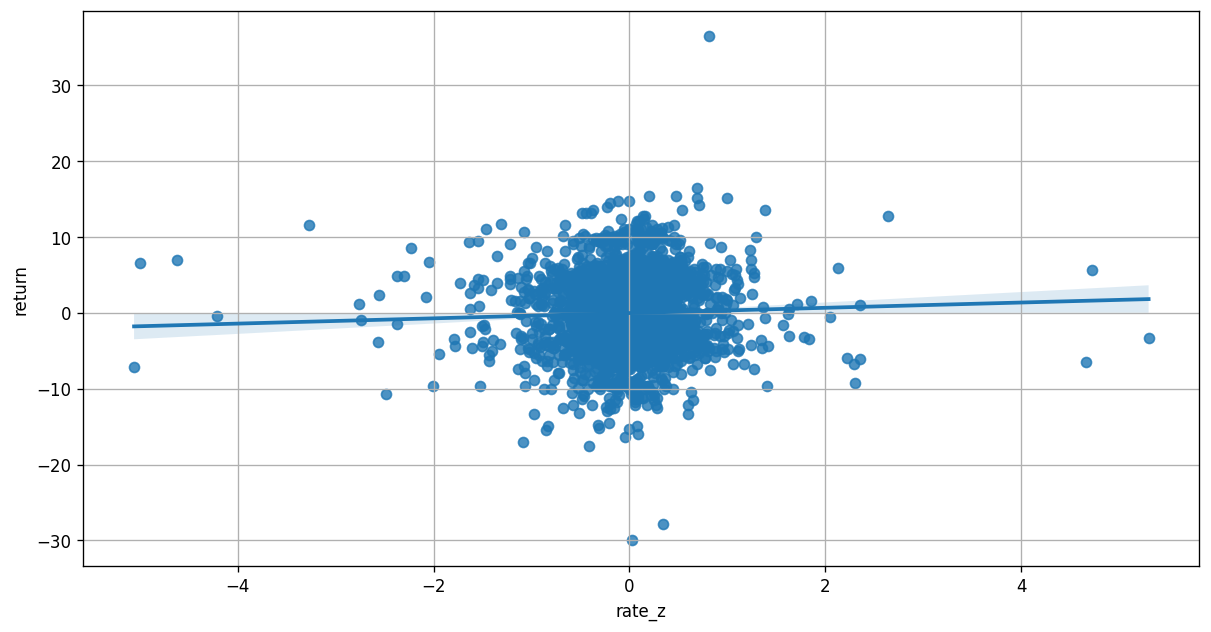

In [82]:
sns.regplot(x=working_data['rate_z'], y=working_data['return'])
plt.grid(True)

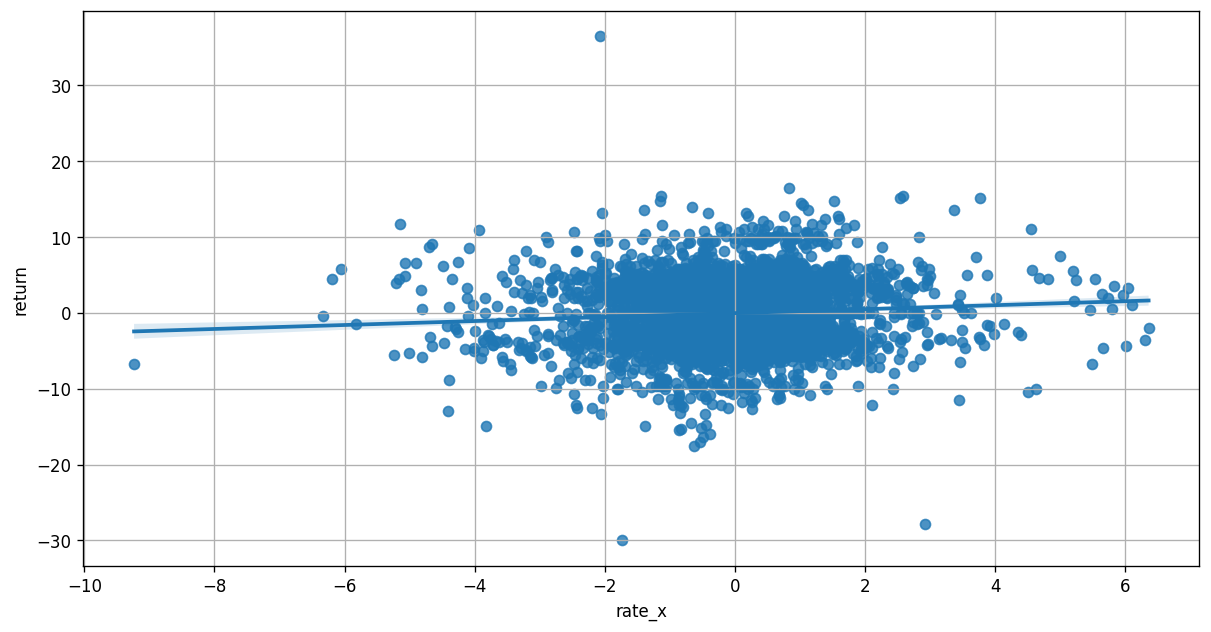

In [83]:
sns.regplot(x=working_data['rate_x'], y=working_data['return'])
plt.grid(True)

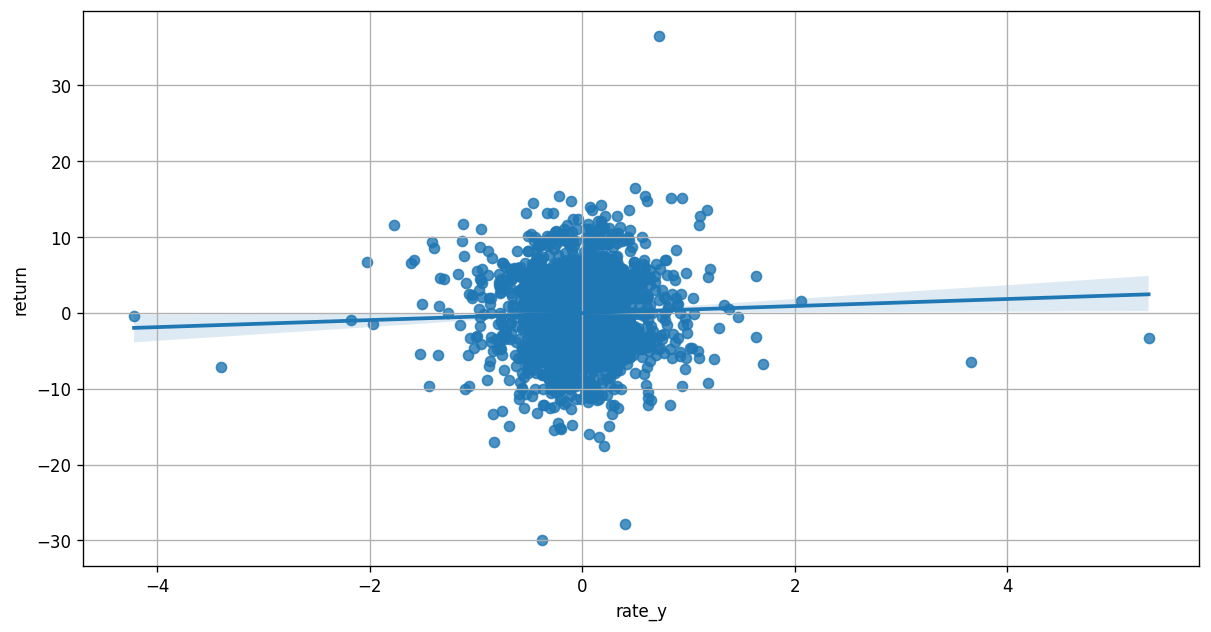

In [84]:
sns.regplot(x=working_data['rate_y'], y=working_data['return'])
plt.grid(True)

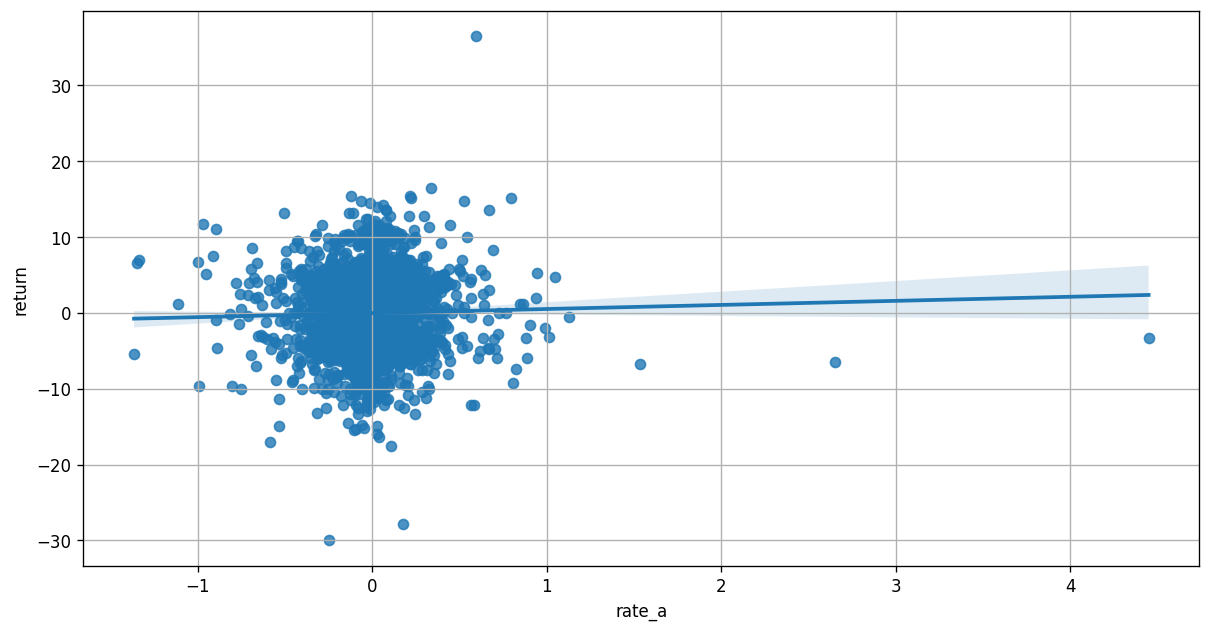

In [85]:
sns.regplot(x=working_data['rate_a'], y=working_data['return'])
plt.grid(True)